In [76]:
import os
from PIL import Image
import numpy as np
import cv2
import sys
sys.path.append("../")
from data_file.CBCT_preprocess import read_raw
import matplotlib.pyplot as plt
import SimpleITK as sitk

p_path = "/home/gabrielidis/These/medical_project//artefacts/results/expriment_1/big_endian/acquisition_1/predicted/450_predicted_image.png"
gt_path = "/home/gabrielidis/These/medical_project/artefacts/results/expriment_1/big_endian/acquisition_1/ground_truth/579_ground_truth_image.png"

In [69]:
predicted = cv2.imread(p_path,cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(gt_path,cv2.IMREAD_GRAYSCALE)


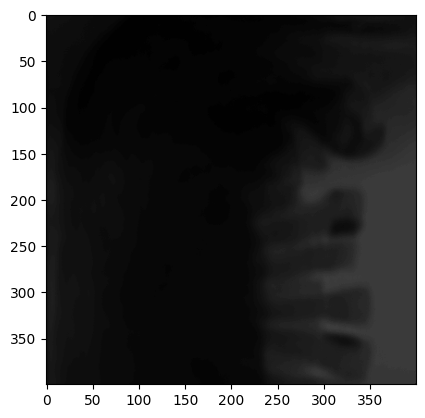

In [71]:
plt.imshow(cv2.resize(predicted,(400,400), interpolation=cv2.INTER_CUBIC), cmap= "gray")

In [72]:
predicted

array([[255, 255,  21, ...,  21,  21,  12],
       [255,  99,  21, ...,  21,  21,  21],
       [ 24,  18,  21, ...,  21,  21,  21],
       ...,
       [ 15,  18,  21, ...,  56,  56,  54],
       [ 15,  18,  21, ...,  56,  56,  56],
       [  9,  15,  18, ...,  56,  56,  27]], dtype=uint8)

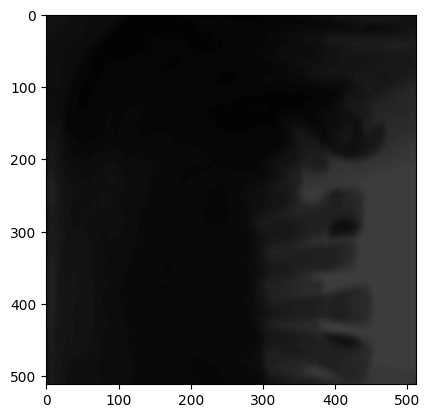

In [65]:
plt.imshow(predicted, cmap="gray")

In [51]:
predicted.tofile("test.raw")

In [130]:
test = read_raw("IE1705794_P406.i180483.raw",(400,400), big_endian= True)
test.shape

(400, 400)

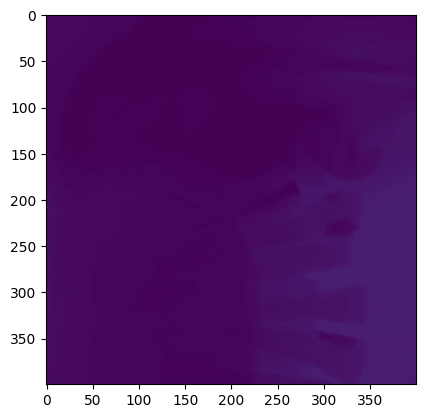

In [131]:
plt.imshow(test)

In [132]:
def write_raw(array, file_name, image_size=(400, 400), sitk_pixel_type=sitk.sitkUInt16, image_spacing=None, image_origin=None, big_endian=True, umin=137, umax=52578):
    # Scale array back to the original range
    array = (array * (umax - umin)) + umin
    array = array.astype(np.uint16)  # convert back to uint16 (based on sitk_pixel_type)
    
    # Write raw file
    with open(file_name + '.raw', 'wb') as f:
        f.write(array.tobytes())
    
    # Convert numpy array to sitk image
    img = sitk.GetImageFromArray(array)
    img.SetSpacing(image_spacing if image_spacing else [1]*len(image_size))
    img.SetOrigin(image_origin if image_origin else [0]*len(image_size))

    # Prepare metadata dictionary
    meta_dict = {
        'NDims': str(len(image_size)),
        'DimSize': ' '.join(map(str, image_size)),
        'ElementType': 'MET_USHORT',
        'BinaryDataByteOrderMSB': 'False' if big_endian else 'True',
        'ElementSpacing': ' '.join(map(str, img.GetSpacing())),
        'Offset': ' '.join(map(str, img.GetOrigin())),
        'ElementDataFile': os.path.basename(file_name) + '.raw',
    }

    # Add metadata to the image
    for k, v in meta_dict.items():
        img.SetMetaData(k, v)

    # Use ImageFileWriter to write the image
    writer = sitk.ImageFileWriter()
    writer.SetFileName(file_name + '.mhd')
    writer.SetUseCompression(False)
    writer.Execute(img)

In [137]:
write_raw(test,"my_image")

In [140]:
t = read_raw("my_image.raw", big_endian= False)

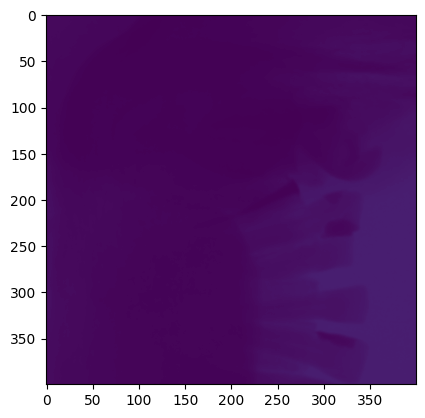

In [141]:
plt.imshow(t)